Unique labels: [np.int8(0), np.int8(1), np.int8(2), np.int8(3), np.int8(4), np.int8(5)]
Label map: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
Label map types: {0: <class 'int'>, 1: <class 'int'>, 2: <class 'int'>, 3: <class 'int'>, 4: <class 'int'>, 5: <class 'int'>}
Target names: ['0', '1', '2', '3', '4', '5']
Target names types: [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]
Accuracy: 0.5775

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.75      0.67       124
           1       0.53      0.91      0.67       131
           2       1.00      0.03      0.06        35
           3       0.80      0.15      0.26        52
           4       0.83      0.23      0.36        43
           5       0.00      0.00      0.00        15

    accuracy                           0.58       400
   macro avg       0.63      0.35      0.34       400
weighted avg       0.64      0.58      0.51       40

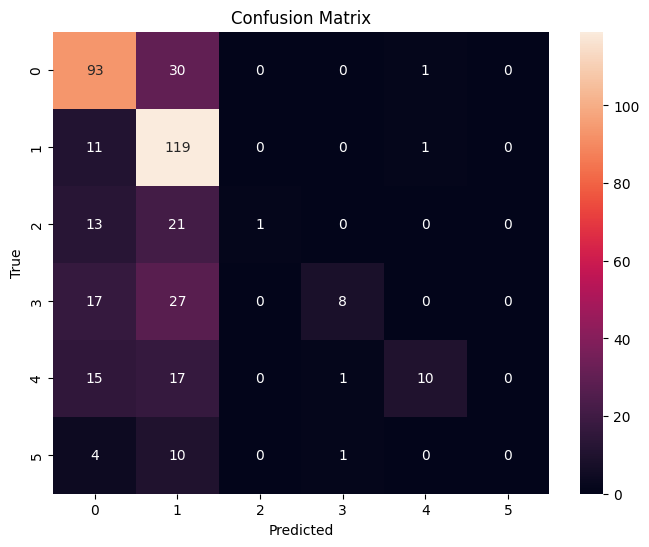

In [5]:
# Emotion Classification Model - Complete Project Code (Fixed)

# === Step 1: Imports ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st

# === Step 2: Load Dataset ===
# Using the HuggingFace emotion dataset (manually downloaded or loaded via datasets library)
# Example assumes CSV format with 'text' and 'label' columns
df = pd.read_csv("emotion_dataset.csv")  # Replace with your path

# If labels are strings, encode them
df['label'] = df['label'].astype('category')
df['label_code'] = df['label'].cat.codes
label_map = dict(enumerate(df['label'].cat.categories))
reverse_label_map = {v: k for k, v in label_map.items()}

# === Step 3: Preprocessing ===
X = df['text']
y = df['label_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# === Step 4: Model Training ===
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# === Step 5: Evaluation ===
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

# FIX: Proper handling of labels and target names
unique_labels = sorted(np.unique(np.concatenate((y_test, y_pred))))

# Debug: Print to check what's in label_map and unique_labels
print("Unique labels:", unique_labels)
print("Label map:", label_map)
print("Label map types:", {k: type(v) for k, v in label_map.items()})

# Ensure target_names are all strings
target_names = []
for i in unique_labels:
    if i in label_map:
        name = str(label_map[i])  # Convert to string explicitly
        target_names.append(name)
    else:
        target_names.append(f"Unknown_{i}")

print("Target names:", target_names)
print("Target names types:", [type(name) for name in target_names])

# Generate classification report - try without labels parameter first
try:
    report = classification_report(
        y_test, y_pred, 
        target_names=target_names,
        zero_division=0
    )
except Exception as e:
    print(f"Error with target_names: {e}")
    # Fallback: Use basic classification report without custom names
    report = classification_report(y_test, y_pred, zero_division=0)

cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
try:
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
except Exception as e:
    print(f"Error plotting confusion matrix: {e}")
    # Fallback: Plot without custom labels
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
plt.show()

# === Step 6: Optional Streamlit UI ===
def run_streamlit_app():
    st.title("Emotion Classifier")
    user_input = st.text_input("Enter a sentence to classify emotion")

    if user_input:
        user_vec = vectorizer.transform([user_input])
        prediction = model.predict(user_vec)[0]
        confidence = model.predict_proba(user_vec)[0]
        
        st.write(f"Predicted Emotion: **{label_map[prediction]}**")
        st.write(f"Confidence: **{confidence[prediction]:.2%}**")

        # Show all probabilities
        st.markdown("---")
        st.write("**All Emotion Probabilities:**")
        prob_df = pd.DataFrame({
            'Emotion': [label_map[i] for i in range(len(confidence))],
            'Probability': confidence
        }).sort_values('Probability', ascending=False)
        st.dataframe(prob_df)

        st.markdown("---")
        st.write("**Label Mapping:**")
        st.json({str(k): v for k, v in label_map.items()})

# Alternative: If you want to run without Streamlit, comment out the Streamlit section
# and just run the model training and evaluation parts

# === End of Project ===
# Note: To run Streamlit app, call run_streamlit_app() or use `streamlit run this_script.py`

📥 Downloading wordnet...
📥 Downloading omw-1.4...
🚀 Starting Emotion Classification Analysis
📊 Creating sample emotion dataset...
✅ Dataset created with 125 samples
📈 Emotion distribution:
emotion
happy      27
angry      26
sad        24
neutral    24
fear       24
Name: count, dtype: int64
🔧 Preprocessing text data...
✅ Data prepared - Train: 100, Test: 25
🤖 Training multiple models...
  🔄 Training Naive Bayes...
    ✅ Naive Bayes trained - Best score: 0.890
  🔄 Training Logistic Regression...
    ✅ Logistic Regression trained - Best score: 0.890
  🔄 Training Random Forest...
    ✅ Random Forest trained - Best score: 0.870
  🔄 Training SVM...
    ✅ SVM trained - Best score: 0.870
📊 Evaluating models...
  📈 Naive Bayes: 1.000 accuracy
  📈 Logistic Regression: 1.000 accuracy
  📈 Random Forest: 1.000 accuracy
  📈 SVM: 1.000 accuracy
🏆 Best model: Naive Bayes (1.000)
📊 Creating confusion matrix visualizations...


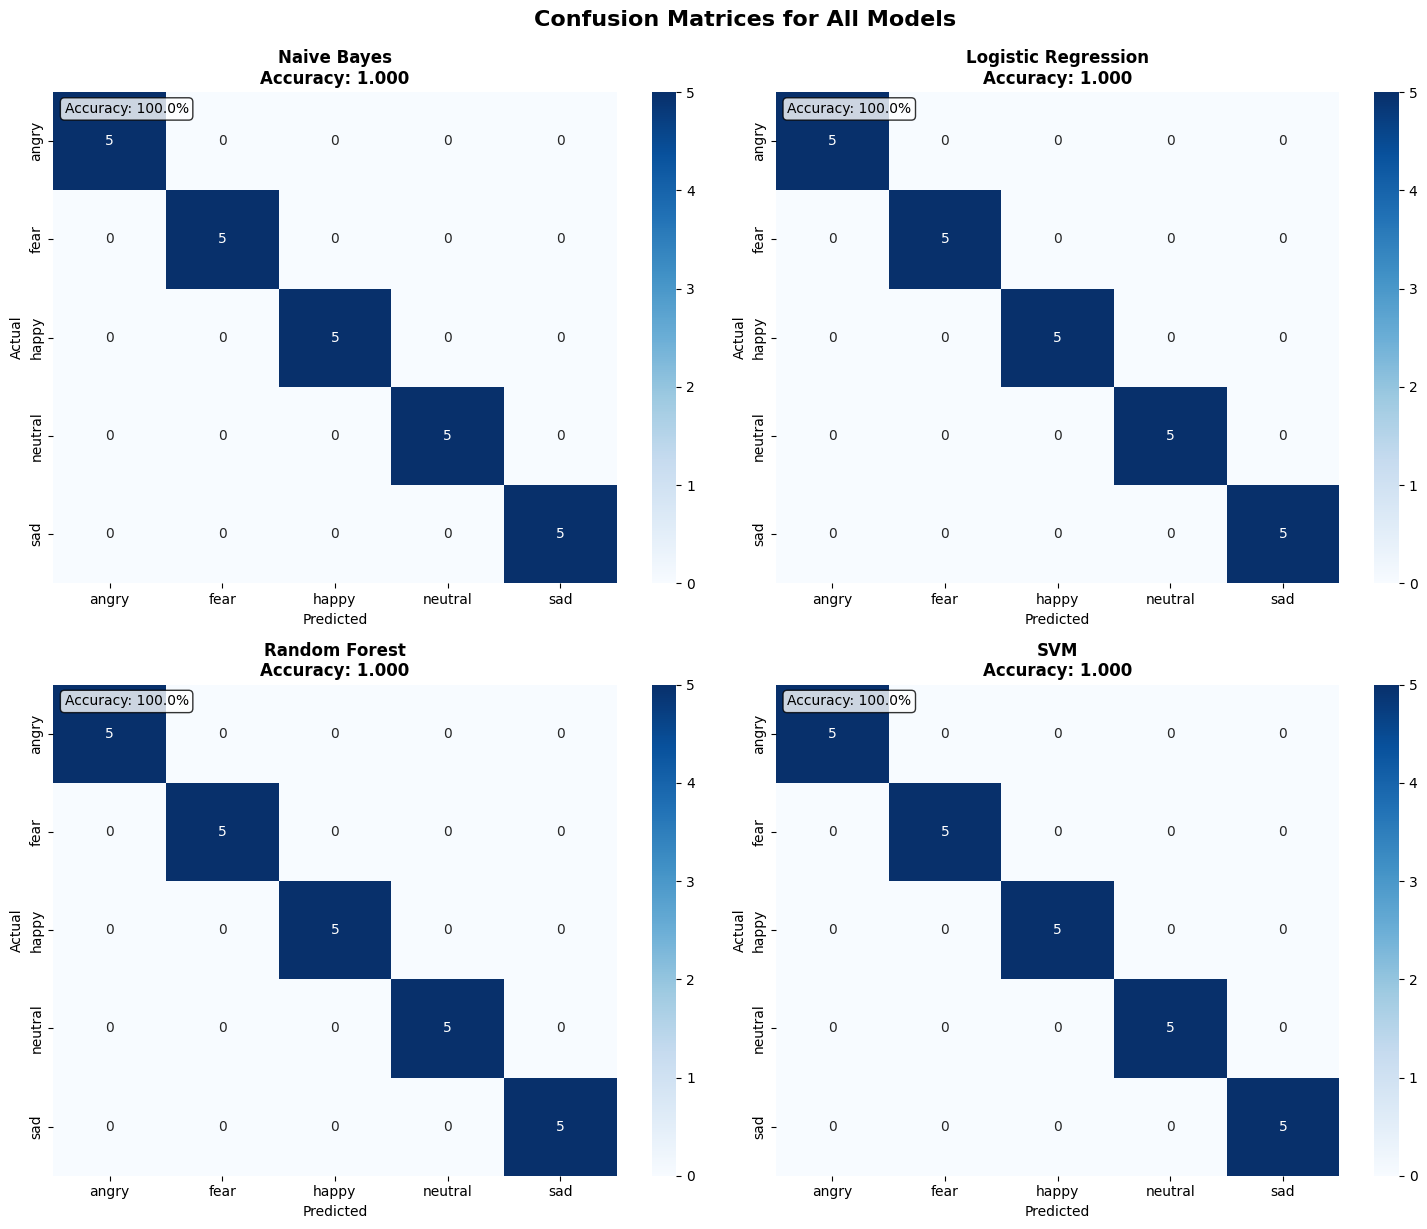

📊 Creating model comparison chart...


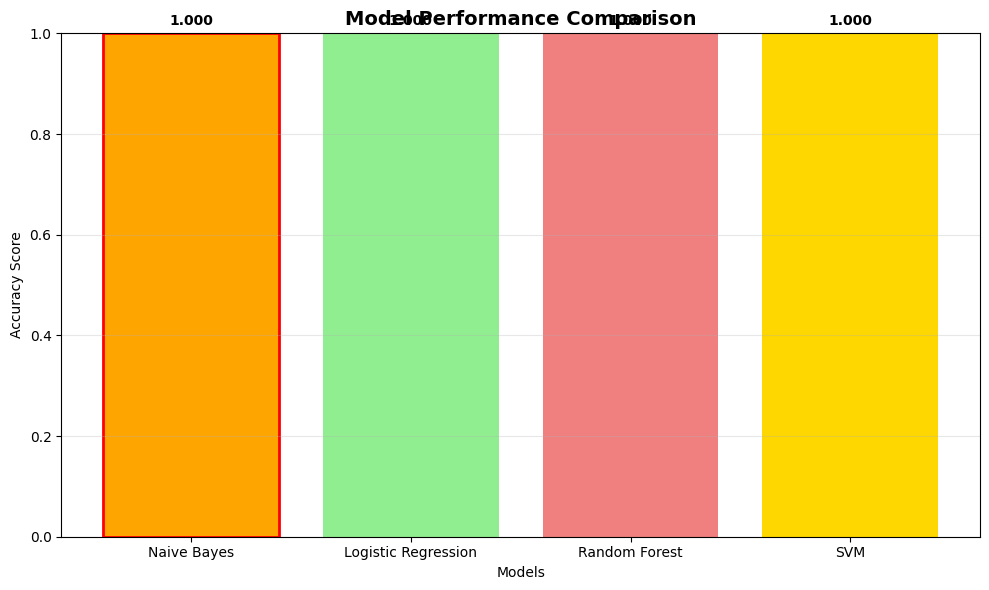


📊 DETAILED MODEL EVALUATION RESULTS

🤖 NAIVE BAYES
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         5
        fear       1.00      1.00      1.00         5
       happy       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00         5
         sad       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

🏆 *** BEST MODEL *** 🏆

🤖 LOGISTIC REGRESSION
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         5
        fear       1.00      1.00      1.00         5
       happy       1.00      1.00      1.00         5
     neutral       1.00      1.0

In [10]:
# Emotion Classification Model
# A comprehensive ML project for classifying text emotions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Text processing libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Download required NLTK data
def download_nltk_data():
    """Download required NLTK datasets with proper error handling."""
    required_downloads = [
        ('tokenizers/punkt', 'punkt'),
        ('tokenizers/punkt_tab', 'punkt_tab'),
        ('corpora/stopwords', 'stopwords'),
        ('corpora/wordnet', 'wordnet'),
        ('corpora/omw-1.4', 'omw-1.4')
    ]
    
    for resource_path, download_name in required_downloads:
        try:
            nltk.data.find(resource_path)
        except LookupError:
            print(f"📥 Downloading {download_name}...")
            nltk.download(download_name, quiet=True)

# Download all required NLTK data
download_nltk_data()

class EmotionClassifier:
    """
    A comprehensive emotion classification system that processes text data
    and predicts emotions using multiple ML algorithms.
    """
    
    def __init__(self):
        """Initialize the emotion classifier with preprocessing tools."""
        # Initialize with basic error handling
        try:
            self.lemmatizer = WordNetLemmatizer()
        except:
            print("⚠️ Warning: WordNetLemmatizer not available, using basic preprocessing")
            self.lemmatizer = None
            
        try:
            self.stop_words = set(stopwords.words('english'))
        except:
            print("⚠️ Warning: NLTK stopwords not available, using basic stopwords")
            self.stop_words = {
                'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
                'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
                'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
                'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
                'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
                'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
                'at', 'by', 'for', 'with', 'through', 'during', 'before', 'after', 'above', 
                'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
                'further', 'then', 'once'
            }
            
        self.vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
        self.models = {}
        self.best_model = None
        self.best_model_name = None
        
    def create_sample_dataset(self):
        """
        Create a sample emotion dataset for demonstration.
        In practice, you would load your own dataset here.
        """
        print("📊 Creating sample emotion dataset...")
        
        # Sample data - replace with your actual dataset
        emotions_data = {
            'text': [
                # Happy emotions
                "I'm so excited about this amazing opportunity!",
                "What a beautiful day! I feel fantastic!",
                "I love spending time with my family and friends",
                "This is the best news I've heard all week!",
                "I'm thrilled about my new job promotion",
                "Life is wonderful and full of possibilities",
                "I can't stop smiling after that great performance",
                "Today was absolutely perfect in every way",
                
                # Sad emotions
                "I feel so lonely and empty inside",
                "This terrible news has really upset me",
                "I'm devastated by what happened yesterday",
                "Everything seems hopeless right now",
                "I miss my old friends so much",
                "This loss is too painful to bear",
                "I feel like crying all the time",
                "My heart is broken into pieces",
                
                # Angry emotions
                "I'm furious about this unfair treatment!",
                "This makes me so mad I can't think straight",
                "I hate when people are dishonest like this",
                "This is absolutely outrageous and unacceptable!",
                "I'm fed up with all these lies",
                "This behavior is completely infuriating",
                "I'm angry beyond words right now",
                "This injustice makes my blood boil",
                
                # Neutral emotions
                "The weather forecast shows rain tomorrow",
                "I need to buy groceries after work",
                "The meeting is scheduled for 3 PM",
                "Please submit your report by Friday",
                "The train arrives at platform 2",
                "I'll be working from home today",
                "The document is saved in the folder",
                "We have a conference call at noon",
                
                # Fear emotions
                "I'm terrified of what might happen next",
                "This situation makes me very anxious",
                "I'm worried about the test results",
                "The dark alley scared me completely",
                "I'm afraid I won't succeed in this",
                "This uncertainty is really frightening",
                "I panic whenever I think about it",
                "The thought of failure terrifies me"
            ],
            'emotion': [
                # Happy labels
                'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
                # Sad labels
                'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad',
                # Angry labels
                'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry',
                # Neutral labels
                'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
                # Fear labels
                'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear'
            ]
        }
        
        # Create DataFrame
        df = pd.DataFrame(emotions_data)
        
        # Add more variety by duplicating and slightly modifying entries
        additional_data = []
        for idx, row in df.iterrows():
            # Create variations
            text_variations = [
                row['text'].replace('!', '.'),
                row['text'].replace('?', '.'),
                row['text'].lower(),
                row['text'].upper(),
            ]
            for var_text in text_variations:
                if var_text != row['text']:  # Avoid exact duplicates
                    additional_data.append({'text': var_text, 'emotion': row['emotion']})
        
        # Add the variations to increase dataset size
        additional_df = pd.DataFrame(additional_data)
        df = pd.concat([df, additional_df], ignore_index=True)
        
        print(f"✅ Dataset created with {len(df)} samples")
        print(f"📈 Emotion distribution:")
        print(df['emotion'].value_counts())
        
        return df
    
    def preprocess_text(self, text):
        """
        Clean and preprocess text data for better model performance.
        
        Args:
            text (str): Raw text to preprocess
            
        Returns:
            str: Cleaned and preprocessed text
        """
        try:
            # Convert to lowercase
            text = str(text).lower()
            
            # Remove special characters and digits
            text = re.sub(r'[^a-zA-Z\s]', '', text)
            
            # Remove extra whitespace
            text = re.sub(r'\s+', ' ', text).strip()
            
            # Tokenize with fallback
            try:
                tokens = word_tokenize(text)
            except LookupError:
                # Fallback to simple split if NLTK tokenizer fails
                tokens = text.split()
            
            # Remove stopwords and lemmatize
            processed_tokens = []
            for token in tokens:
                if token not in self.stop_words and len(token) > 2:
                    try:
                        if self.lemmatizer:
                            lemmatized = self.lemmatizer.lemmatize(token)
                            processed_tokens.append(lemmatized)
                        else:
                            processed_tokens.append(token)
                    except:
                        # Fallback to original token if lemmatization fails
                        processed_tokens.append(token)
            
            return ' '.join(processed_tokens)
        
        except Exception as e:
            print(f"⚠️ Warning: Error preprocessing text '{text[:50]}...': {e}")
            # Return basic cleaned text as fallback
            return re.sub(r'[^a-zA-Z\s]', '', str(text).lower()).strip()
    
    def prepare_data(self, df):
        """
        Prepare data for training by cleaning text and encoding labels.
        
        Args:
            df (DataFrame): Input dataset
            
        Returns:
            tuple: X_train, X_test, y_train, y_test
        """
        print("🔧 Preprocessing text data...")
        
        # Clean text data
        df['cleaned_text'] = df['text'].apply(self.preprocess_text)
        
        # Remove empty texts after preprocessing
        df = df[df['cleaned_text'].str.len() > 0]
        
        # Split data
        X = df['cleaned_text']
        y = df['emotion']
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"✅ Data prepared - Train: {len(X_train)}, Test: {len(X_test)}")
        
        return X_train, X_test, y_train, y_test
    
    def train_models(self, X_train, y_train):
        """
        Train multiple ML models and compare their performance.
        
        Args:
            X_train: Training features
            y_train: Training labels
        """
        print("🤖 Training multiple models...")
        
        # Define models to train
        model_configs = {
            'Naive Bayes': {
                'model': MultinomialNB(),
                'params': {'alpha': [0.1, 0.5, 1.0, 2.0]}
            },
            'Logistic Regression': {
                'model': LogisticRegression(random_state=42, max_iter=1000),
                'params': {'C': [0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs']}
            },
            'Random Forest': {
                'model': RandomForestClassifier(random_state=42),
                'params': {'n_estimators': [50, 100], 'max_depth': [10, 20, None]}
            },
            'SVM': {
                'model': SVC(random_state=42),
                'params': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
            }
        }
        
        # Train each model with hyperparameter tuning
        for name, config in model_configs.items():
            print(f"  🔄 Training {name}...")
            
            # Create pipeline
            pipeline = Pipeline([
                ('vectorizer', self.vectorizer),
                ('classifier', config['model'])
            ])
            
            # Prepare parameters for grid search
            param_grid = {}
            for param, values in config['params'].items():
                param_grid[f'classifier__{param}'] = values
            
            # Grid search
            grid_search = GridSearchCV(
                pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1
            )
            
            grid_search.fit(X_train, y_train)
            self.models[name] = grid_search.best_estimator_
            
            print(f"    ✅ {name} trained - Best score: {grid_search.best_score_:.3f}")
    
    def evaluate_models(self, X_test, y_test):
        """
        Evaluate all trained models and select the best one.
        
        Args:
            X_test: Test features
            y_test: Test labels
            
        Returns:
            dict: Evaluation results for all models
        """
        print("📊 Evaluating models...")
        
        results = {}
        best_accuracy = 0
        
        for name, model in self.models.items():
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            results[name] = {
                'accuracy': accuracy,
                'predictions': y_pred,
                'classification_report': classification_report(y_test, y_pred),
                'confusion_matrix': confusion_matrix(y_test, y_pred)
            }
            
            # Track best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                self.best_model = model
                self.best_model_name = name
            
            print(f"  📈 {name}: {accuracy:.3f} accuracy")
        
        print(f"🏆 Best model: {self.best_model_name} ({best_accuracy:.3f})")
        
        return results
    
    def plot_confusion_matrix(self, y_test, results):
        """
        Create confusion matrix visualizations for all models.
        
        Args:
            y_test: True labels
            results: Model evaluation results
        """
        print("📊 Creating confusion matrix visualizations...")
        
        n_models = len(results)
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()
        
        # Get unique labels for consistent ordering
        labels = sorted(y_test.unique())
        
        for idx, (name, result) in enumerate(results.items()):
            cm = result['confusion_matrix']
            
            # Create heatmap
            sns.heatmap(
                cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                ax=axes[idx]
            )
            
            axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}', fontweight='bold')
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('Actual')
            
            # Add accuracy text
            accuracy_text = f'Accuracy: {result["accuracy"]:.1%}'
            axes[idx].text(0.02, 0.98, accuracy_text, transform=axes[idx].transAxes,
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                          verticalalignment='top')
        
        plt.tight_layout()
        plt.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold', y=1.02)
        plt.show()
    
    def plot_model_comparison(self, results):
        """
        Create a bar chart comparing model accuracies.
        
        Args:
            results: Model evaluation results
        """
        print("📊 Creating model comparison chart...")
        
        model_names = list(results.keys())
        accuracies = [results[name]['accuracy'] for name in model_names]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
        
        # Add value labels on bars
        for bar, acc in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
        plt.ylabel('Accuracy Score')
        plt.xlabel('Models')
        plt.ylim(0, 1)
        plt.grid(axis='y', alpha=0.3)
        
        # Highlight best model
        best_idx = accuracies.index(max(accuracies))
        bars[best_idx].set_color('orange')
        bars[best_idx].set_edgecolor('red')
        bars[best_idx].set_linewidth(2)
        
        plt.tight_layout()
        plt.show()
    
    def display_detailed_results(self, results):
        """
        Display detailed classification reports for all models.
        
        Args:
            results: Model evaluation results
        """
        print("\n" + "="*60)
        print("📊 DETAILED MODEL EVALUATION RESULTS")
        print("="*60)
        
        for name, result in results.items():
            print(f"\n🤖 {name.upper()}")
            print("-" * 40)
            print(f"Accuracy: {result['accuracy']:.4f}")
            print("\nClassification Report:")
            print(result['classification_report'])
            
            if name == self.best_model_name:
                print("🏆 *** BEST MODEL *** 🏆")
    
    def predict_emotion(self, text):
        """
        Predict emotion for a given text using the best model.
        
        Args:
            text (str): Input text to classify
            
        Returns:
            str: Predicted emotion
        """
        if self.best_model is None:
            raise ValueError("No trained model available. Please train models first.")
        
        # Preprocess the text
        cleaned_text = self.preprocess_text(text)
        
        # Make prediction
        prediction = self.best_model.predict([cleaned_text])[0]
        
        # Get prediction probabilities if available
        try:
            probabilities = self.best_model.predict_proba([cleaned_text])[0]
            classes = self.best_model.classes_
            
            print(f"\n🎯 Prediction for: '{text}'")
            print(f"📝 Predicted Emotion: {prediction.upper()}")
            print(f"📊 Confidence Scores:")
            for emotion, prob in zip(classes, probabilities):
                print(f"  {emotion.capitalize()}: {prob:.3f}")
        except:
            print(f"\n🎯 Predicted Emotion: {prediction.upper()}")
        
        return prediction
    
    def run_complete_analysis(self):
        """
        Run the complete emotion classification pipeline.
        """
        print("🚀 Starting Emotion Classification Analysis")
        print("="*50)
        
        # Step 1: Create/Load dataset
        df = self.create_sample_dataset()
        
        # Step 2: Prepare data
        X_train, X_test, y_train, y_test = self.prepare_data(df)
        
        # Step 3: Train models
        self.train_models(X_train, y_train)
        
        # Step 4: Evaluate models
        results = self.evaluate_models(X_test, y_test)
        
        # Step 5: Create visualizations
        self.plot_confusion_matrix(y_test, results)
        self.plot_model_comparison(results)
        
        # Step 6: Display detailed results
        self.display_detailed_results(results)
        
        # Step 7: Interactive prediction demo
        print("\n" + "="*50)
        print("🎯 INTERACTIVE EMOTION PREDICTION DEMO")
        print("="*50)
        
        # Demo predictions
        test_sentences = [
            "I'm absolutely thrilled about my vacation!",
            "This situation makes me really upset and disappointed.",
            "I'm so angry about this unfair decision!",
            "The meeting is scheduled for tomorrow at 9 AM.",
            "I'm really scared about the upcoming exam."
        ]
        
        for sentence in test_sentences:
            self.predict_emotion(sentence)
            print("-" * 40)
        
        return results

# Interactive function for custom predictions
def predict_custom_emotion(classifier, custom_text=None):
    """
    Function to predict emotion for custom text input.
    
    Args:
        classifier: Trained EmotionClassifier instance
        custom_text: Text to analyze (if None, will prompt for input)
    """
    if custom_text is None:
        print("\n🎯 Enter your text for emotion prediction:")
        custom_text = input("Text: ")
    
    if custom_text.strip():
        classifier.predict_emotion(custom_text)
    else:
        print("❌ Please enter some text to analyze.")

# Main execution
if __name__ == "__main__":
    # Create and run emotion classifier
    classifier = EmotionClassifier()
    results = classifier.run_complete_analysis()
    
    # Optional: Interactive prediction
    print("\n" + "="*50)
    print("🎯 TRY YOUR OWN TEXT!")
    print("="*50)
    print("You can now use predict_custom_emotion(classifier, 'your text here')")
    print("or call predict_custom_emotion(classifier) for interactive input")
    
    # Example usage:
    # predict_custom_emotion(classifier, "I love this amazing weather!")
    # predict_custom_emotion(classifier)  # Interactive input